In [80]:
import numpy as np
import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


### EDA & Data Preprocessing

#### 1. Read the dataset

In [3]:

#importing the dataset, set RowNumber as index
df = pd.read_csv('bank (1).csv', index_col='RowNumber')

In [4]:
df.shape # 10,000 rows, 13 columns

(10000, 13)

In [5]:
df.head(2) #Exited is target column

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [6]:
#Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


Surname, Gender and Gepgraphy are Object type

In [7]:
#Check for missing values
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

 There is no missing values

In [8]:
#look at distribution of exited and non-exited customers

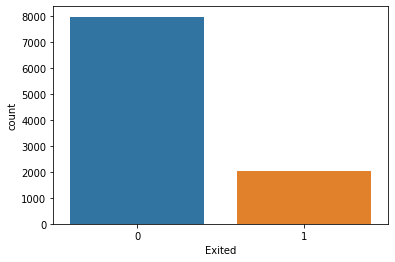

In [9]:
sns.countplot(x="Exited", data=df)

Data set has has only around 2000 exited customers and about 8000 Customers are still with Bank- it has bias towards existing customers.

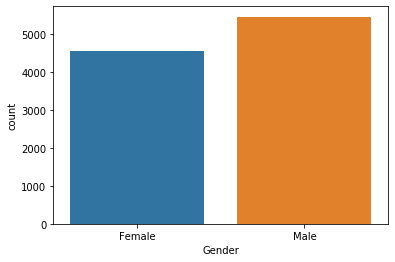

In [10]:
sns.countplot(x="Gender", data=df)

Bank has bout 4500 female customers and 5500 male customers

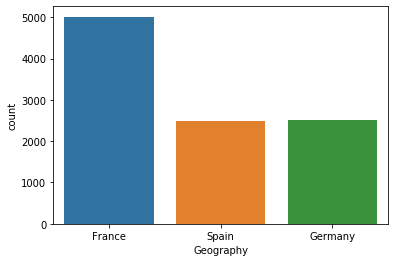

In [11]:
sns.countplot(x="Geography", data=df)

Most of the Customers are from France,  Customers from spain and Genrmany are about half in numbers of France

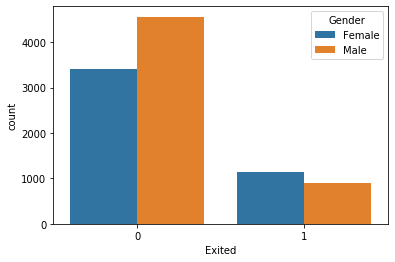

In [12]:
 sns.countplot(x="Exited", hue="Gender", data=df)

Above plot says that female customers have higher propensity to exit the Bank

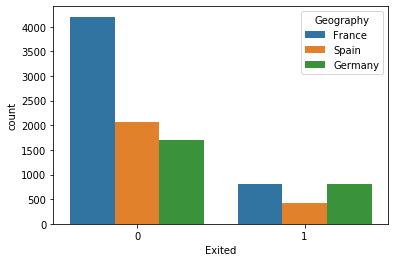

In [13]:
 sns.countplot(x="Exited", hue="Geography", data=df)

Customers from Germany have highest propensity to to exit the Bank

In [14]:
#Lets Check Distribution of exited/non-exited Customers as per the age

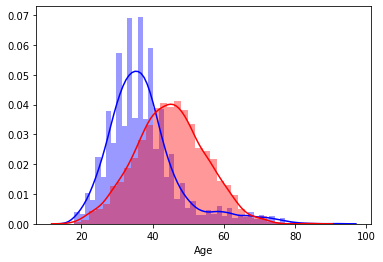

In [15]:
sns.distplot(df['Age'][df['Exited']==0],color='blue',label='non-exited')
sns.distplot(df['Age'][df['Exited']==1],color='red',label='exited')
plt.show()



Age distribution of customers who exited bank is normally distributed while those who stays with bank is right skewed
indicating that most of the existing customers of bank are lower than 50 years of age. This may also indicate that
old age customers have exited the bank.

#### 2. Drop the columns which are unique for all users like IDs & 3. Distinguish the feature and target set

In [36]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [37]:
# Convert data into feature and Target set. Also CustomerId and Surname will not contribute to model building
#hence we wil drop these 2 colmns as well
X=df.drop(labels=['CustomerId','Surname','Exited'], axis=1) # Feature Set
y=df['Exited'] # Target set

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.2+ MB


In [39]:
# Geography and gender are object type, we will convert this into one hot encoding

In [40]:
X= pd.get_dummies(X)

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Geography_France   10000 non-null  uint8  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Female      10000 non-null  uint8  
 12  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(6), uint8(5)
memory usage: 1.0 MB


Object columns- Geography and Genders have been converted to one hot encoded columns

In [42]:
#Lets Check first few rows of feature set

In [44]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
4,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


#### 4. Divide the data set into training and test sets

In [45]:
from sklearn.model_selection import train_test_split
#test train split
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [46]:
#hCheck Shape of test/trainset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7000, 13), (3000, 13), (7000,), (3000,))

#### 5. Normalize the train and test data 

a)Normalise Following features using standard scaler: CreditScore,Age, tenure,Balance,NumOfProducts,EstimatedSalary as these  have running/continuous values

b)We will not normalise following features as they have discrete values either 0 or 1: HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male


In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [153]:
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']].head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
RowNumber,,,,,,
2318,630,36,2,110414.48,1,48984.95
260,850,38,3,54901.01,1,140075.55


In [48]:
X_train.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,
2318,630,36,2,110414.48,1,1,1,48984.95,1,0,0,1,0
260,850,38,3,54901.01,1,1,1,140075.55,0,1,0,0,1


In [49]:
scaler.fit(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
X_train_scaled=scaler.transform(X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

In [55]:
# Transform test set on the same fit as train set
X_test_scaled=scaler.transform(X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

##### Following step puts back scaled data into the dataframe for the columns which  have been scaled while keeping other data intact

In [58]:
# Put back scaled data into the dataframe for the columns which  have been scaled while keeping other data intact
X_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]=X_train_scaled

In [61]:
X_train.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,
2318,-0.212665,-0.275584,-1.044043,0.535759,-0.902887,1,1,-0.885624,1,0,0,1,0
260,2.072829,-0.085732,-0.699815,-0.354525,-0.902887,1,1,0.690326,0,1,0,0,1


In [60]:
X_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']]=X_test_scaled

In [62]:
X_test.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,
1978,0.691144,-0.370510,-1.388270,-1.234987,2.518064,0,0,1.290574,0,0,1,0,1
3881,0.275599,3.141754,1.021323,-1.234987,0.807589,1,1,0.924388,1,0,0,1,0


##### Convert Data into Numpy arrays

In [63]:
# Convert Data into Numpy arrays
X_train_array=np.array(X_train)
X_test_array=np.array(X_test)
y_train_array=np.array(y_train)
y_test_array=np.array(y_test)

In [64]:

X_train_array.shape,X_test_array.shape,y_train_array.shape,y_test_array.shape#check shapes of array

((7000, 13), (3000, 13), (7000,), (3000,))

### MODEL BUILDING

#### 6. Initialize & build the model (Basic Model with 2 hidden layers)

In [106]:
# Initialize Sequential model
model = tf.keras.models.Sequential()


# Add Input layer to the model
model.add(tf.keras.Input(shape=(13,))) # 13 Features

# Batch Normalization Layer
model.add(tf.keras.layers.BatchNormalization())

# Hidden layers
model.add(tf.keras.layers.Dense(13, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.Dense(10, activation='relu', name='Layer_2'))

#Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid', name='Output'))


##### Compile Model

In [107]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

##### Summarise Model

In [108]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 13)                52        
_________________________________________________________________
Layer_1 (Dense)              (None, 13)                182       
_________________________________________________________________
Layer_2 (Dense)              (None, 10)                140       
_________________________________________________________________
Output (Dense)               (None, 1)                 11        
Total params: 385
Trainable params: 359
Non-trainable params: 26
_________________________________________________________________


#### Fit Model & Prediction

In [109]:
model.fit(X_train_array, y_train_array, validation_data=(X_test_array, y_test_array), epochs=150,
          batch_size = 32)

Train on 7000 samples, validate on 3000 samples
Epoch 1/150
7000/7000 [==============================] - 1s 125us/sample - loss: 0.6041 - accuracy: 0.6780 - val_loss: 0.4772 - val_accuracy: 0.7950
Epoch 2/150
7000/7000 [==============================] - 0s 50us/sample - loss: 0.4546 - accuracy: 0.7937 - val_loss: 0.4288 - val_accuracy: 0.8050
Epoch 3/150
7000/7000 [==============================] - 0s 50us/sample - loss: 0.4256 - accuracy: 0.8087 - val_loss: 0.4091 - val_accuracy: 0.8243
Epoch 4/150
7000/7000 [==============================] - ETA: 0s - loss: 0.4083 - accuracy: 0.82 - 0s 53us/sample - loss: 0.4058 - accuracy: 0.8293 - val_loss: 0.3846 - val_accuracy: 0.8407
Epoch 5/150
7000/7000 [==============================] - 0s 52us/sample - loss: 0.3855 - accuracy: 0.8440 - val_loss: 0.3686 - val_accuracy: 0.8487
Epoch 6/150
7000/7000 [==============================] - 0s 52us/sample - loss: 0.3735 - accuracy: 0.8456 - val_loss: 0.3580 - val_accuracy: 0.8520
Epoch 7/150
7000/7000

#### 5.Predict the results using 0.5 as a threshold

In [110]:
model.predict(X_test_array)[:5] # Observe first 5 probabilities

array([[0.46090513],
       [0.01634943],
       [0.01848349],
       [0.6376873 ],
       [0.03994632]], dtype=float32)

In [111]:
th=0.5 # Threshold
y_test_preds = np.where(model.predict(X_test_array) > th, 1, 0)

In [112]:
y_test_preds[:5] # Observe First 5 predictions

array([[0],
       [0],
       [0],
       [1],
       [0]])

#### Confusion Matrix

In [113]:
# Confusion matrix with optimal Threshold on test set
metrics.confusion_matrix(y_test, y_test_preds)

array([[2280,  115],
       [ 305,  300]], dtype=int64)

In [114]:
print('Test Metrics at 0.5 Threshold with basic DNN model\n')
Test_Metrics_Basic_DNN=pd.DataFrame(data=[accuracy_score(y_test, y_test_preds), 
                   recall_score(y_test, y_test_preds), 
                   precision_score(y_test, y_test_preds),
                   f1_score(y_test, y_test_preds)], columns=['Basic DNN'],
             index=["accuracy", "recall", "precision", "f1_score"])
print(Test_Metrics_Basic_DNN)

Test Metrics at 0.5 Threshold with basic DNN model

           Basic DNN
accuracy    0.860000
recall      0.495868
precision   0.722892
f1_score    0.588235


#### Interpretation:
####  test set has actually 3000 customers data out of which (300+305=605) have actually churned 
####   (2289+115=2395) out of 3000 customers in test set have not churned  
#### Model has correctly predicted 300/605 customers who have churned
#### Model has predicted 2280/2395 Customers who have not churned correctly.
#### Recall is poor ,because data set is biased and has less number of records for churned Customers
##### Precision – Of all the users that the algorithm predicts will churn, how many of them do actually churn?
##### Recall – What percentage of users that end up churning does the algorithm successfully find?
#### Both precision and recall are important for evaluating the performance of a churn prediction algorithm. In this case recall is poor, we will try some tuning to get better recall and overall acuracy

### MODEL TUNING

#### A) With 3 Dense Layer

In [128]:
# Initialize Sequential model
model = tf.keras.models.Sequential()


# Add Input layer to the model
model.add(tf.keras.Input(shape=(13,))) # 13 Features

# Batch Normalization Layer
model.add(tf.keras.layers.BatchNormalization())

# Hidden layers
model.add(tf.keras.layers.Dense(13, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.Dense(13, activation='relu', name='Layer_2'))
model.add(tf.keras.layers.Dense(10, activation='relu', name='Layer_3'))
#Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid', name='Output'))

In [129]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [130]:
model.fit(X_train_array, y_train_array, validation_data=(X_test_array, y_test_array), epochs=150,
          batch_size = 32)

Train on 7000 samples, validate on 3000 samples
Epoch 1/150
7000/7000 [==============================] - 2s 321us/sample - loss: 0.5120 - accuracy: 0.7636 - val_loss: 0.4513 - val_accuracy: 0.7977
Epoch 2/150
7000/7000 [==============================] - 1s 112us/sample - loss: 0.4460 - accuracy: 0.8023 - val_loss: 0.4286 - val_accuracy: 0.8160
Epoch 3/150
7000/7000 [==============================] - 1s 112us/sample - loss: 0.4291 - accuracy: 0.8140 - val_loss: 0.4145 - val_accuracy: 0.8197
Epoch 4/150
7000/7000 [==============================] - 1s 113us/sample - loss: 0.4173 - accuracy: 0.8213 - val_loss: 0.4024 - val_accuracy: 0.8270
Epoch 5/150
7000/7000 [==============================] - 1s 112us/sample - loss: 0.4028 - accuracy: 0.8280 - val_loss: 0.3855 - val_accuracy: 0.8413
Epoch 6/150
7000/7000 [==============================] - 1s 112us/sample - loss: 0.3833 - accuracy: 0.8456 - val_loss: 0.3644 - val_accuracy: 0.8517
Epoch 7/150
7000/7000 [==============================] - 1

In [132]:
th=0.5 # Threshold
y_test_preds = np.where(model.predict(X_test_array) > th, 1, 0)

In [141]:
print('Test Metrics at 0.5 Threshold with 3 Hidden layer DNN model\n')
Test_Metrics_3_HiddenLayer_DNN=pd.DataFrame(data=[accuracy_score(y_test, y_test_preds), 
                   recall_score(y_test_array, y_test_preds), 
                   precision_score(y_test_array, y_test_preds),
                   f1_score(y_test_array, y_test_preds)], columns=['3 Hidden Layer DNN'],
             index=["accuracy", "recall", "precision", "f1_score"])
print(Test_Metrics_3_HiddenLayer_DNN)

Test Metrics at 0.5 Threshold with 3 Hidden layer DNN model

           3 Hidden Layer DNN
accuracy             0.858667
recall               0.452893
precision            0.746594
f1_score             0.563786


In [142]:
# Confusion matrix with optimal Threshold on test set
metrics.confusion_matrix(y_test_array, y_test_preds)

array([[2302,   93],
       [ 331,  274]], dtype=int64)

##### Not much improvement in accuracy, precision has improved, recall has gone down,overall accuracy is almost same

#### B) With Batch normalisation after each hidden layer

In [144]:
# Initialize Sequential model
model = tf.keras.models.Sequential()


# Add Input layer to the model
model.add(tf.keras.Input(shape=(13,))) # 13 Features

# Batch Normalization Layer
#model.add(tf.keras.layers.BatchNormalization())

# Hidden layers
model.add(tf.keras.layers.Dense(13, activation='relu', name='Layer_1'))
# Batch Normalization Layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(13, activation='relu', name='Layer_2'))
# Batch Normalization Layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='relu', name='Layer_3'))
# Batch Normalization Layer
model.add(tf.keras.layers.BatchNormalization())
#Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid', name='Output'))

In [145]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [146]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_1 (Dense)              (None, 13)                182       
_________________________________________________________________
batch_normalization_14 (Batc (None, 13)                52        
_________________________________________________________________
Layer_2 (Dense)              (None, 13)                182       
_________________________________________________________________
batch_normalization_15 (Batc (None, 13)                52        
_________________________________________________________________
Layer_3 (Dense)              (None, 10)                140       
_________________________________________________________________
batch_normalization_16 (Batc (None, 10)                40        
_________________________________________________________________
Output (Dense)               (None, 1)               

In [147]:
model.fit(X_train_array, y_train_array, validation_data=(X_test_array, y_test_array), epochs=150,
          batch_size = 32)

Train on 7000 samples, validate on 3000 samples
Epoch 1/150
7000/7000 [==============================] - 4s 590us/sample - loss: 0.6205 - accuracy: 0.6926 - val_loss: 0.5040 - val_accuracy: 0.8027
Epoch 2/150
7000/7000 [==============================] - 1s 132us/sample - loss: 0.4742 - accuracy: 0.8004 - val_loss: 0.4342 - val_accuracy: 0.8157
Epoch 3/150
7000/7000 [==============================] - 1s 137us/sample - loss: 0.4329 - accuracy: 0.8131 - val_loss: 0.4035 - val_accuracy: 0.8257
Epoch 4/150
7000/7000 [==============================] - 1s 135us/sample - loss: 0.4132 - accuracy: 0.8196 - val_loss: 0.3866 - val_accuracy: 0.8327
Epoch 5/150
7000/7000 [==============================] - 1s 135us/sample - loss: 0.3934 - accuracy: 0.8296 - val_loss: 0.3748 - val_accuracy: 0.8397
Epoch 6/150
7000/7000 [==============================] - 1s 136us/sample - loss: 0.3824 - accuracy: 0.8339 - val_loss: 0.3695 - val_accuracy: 0.8423
Epoch 7/150
7000/7000 [==============================] - 1

In [149]:
th=0.5 # Threshold
y_test_preds = np.where(model.predict(X_test_array) > th, 1, 0)

In [150]:
print('Test Metrics at 0.5 Threshold with  Batch Norm after each hidden layer DNN model\n')
Test_Metrics_BatchNorm=pd.DataFrame(data=[accuracy_score(y_test, y_test_preds), 
                   recall_score(y_test_array, y_test_preds), 
                   precision_score(y_test_array, y_test_preds),
                   f1_score(y_test_array, y_test_preds)], columns=['BatchNorm Hidden layers'],
             index=["accuracy", "recall", "precision", "f1_score"])
print(Test_Metrics_BatchNorm)

Test Metrics at 0.5 Threshold with  Batch Norm after each hidden layer DNN model

           BatchNorm Hidden layers
accuracy                  0.863667
recall                    0.519008
precision                 0.726852
f1_score                  0.605593


In [151]:
# Confusion matrix with optimal Threshold on test set
metrics.confusion_matrix(y_test_array, y_test_preds)

array([[2277,  118],
       [ 291,  314]], dtype=int64)

#### Overall Accuracy, recall and F1 score has improved after adding Batch Normalisation after each hidden layer

#### C) Using Weight and Bias initializer

In [164]:
from keras import initializers

In [183]:
# Initialize Sequential model
model = tf.keras.models.Sequential()


# Add Input layer to the model
model.add(tf.keras.Input(shape=(13,))) # 13 Features


# Hidden layers
model.add(tf.keras.layers.Dense(13, kernel_initializer='he_normal', bias_initializer='Ones',activation='relu', name='Layer_1'))
# Batch Normalization Layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(13, kernel_initializer='he_normal',bias_initializer='Ones',activation='relu', name='Layer_2'))
# Batch Normalization Layer
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10,kernel_initializer='he_normal',bias_initializer='Ones', activation='relu', name='Layer_3'))
# Batch Normalization Layer
model.add(tf.keras.layers.BatchNormalization())
#Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid', name='Output'))

In [184]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [188]:
model.fit(X_train_array, y_train_array, validation_data=(X_test_array, y_test_array), epochs=50,
          batch_size = 32)

Train on 7000 samples, validate on 3000 samples
Epoch 1/50
7000/7000 [==============================] - 1s 135us/sample - loss: 0.3236 - accuracy: 0.8650 - val_loss: 0.3442 - val_accuracy: 0.8550
Epoch 2/50
7000/7000 [==============================] - 1s 137us/sample - loss: 0.3197 - accuracy: 0.8726 - val_loss: 0.3462 - val_accuracy: 0.8553
Epoch 3/50
7000/7000 [==============================] - 1s 137us/sample - loss: 0.3243 - accuracy: 0.8650 - val_loss: 0.3483 - val_accuracy: 0.8563
Epoch 4/50
7000/7000 [==============================] - 1s 137us/sample - loss: 0.3178 - accuracy: 0.8663 - val_loss: 0.3461 - val_accuracy: 0.8560
Epoch 5/50
7000/7000 [==============================] - 1s 133us/sample - loss: 0.3202 - accuracy: 0.8667 - val_loss: 0.3496 - val_accuracy: 0.8560
Epoch 6/50
7000/7000 [==============================] - 1s 137us/sample - loss: 0.3194 - accuracy: 0.8671 - val_loss: 0.3445 - val_accuracy: 0.8563
Epoch 7/50
7000/7000 [==============================] - 1s 133us

In [191]:
th=0.5 # Threshold
y_test_preds = np.where(model.predict(X_test_array) > th, 1, 0)

In [192]:
print('Test Metrics at 0.5 Threshold withv Weight and Bias initialization &  Batch Norm after each hidden layer DNN model\n')
Test_Metrics_Weight_Init=pd.DataFrame(data=[accuracy_score(y_test, y_test_preds), 
                   recall_score(y_test_array, y_test_preds), 
                   precision_score(y_test_array, y_test_preds),
                   f1_score(y_test_array, y_test_preds)], columns=['Weight Initialize'],
             index=["accuracy", "recall", "precision", "f1_score"])
print(Test_Metrics_Weight_Init)

Test Metrics at 0.5 Threshold withv Weight and Bias initialization &  Batch Norm after each hidden layer DNN model

           Weight Initialize
accuracy            0.856000
recall              0.447934
precision           0.734417
f1_score            0.556468


In [193]:
# Confusion matrix with optimal Threshold on test set
metrics.confusion_matrix(y_test_array, y_test_preds)

array([[2297,   98],
       [ 334,  271]], dtype=int64)

#### Accuracy has dropped

#### D) Apply Dropout

In [206]:
# Initialize Sequential model
model = tf.keras.models.Sequential()


# Add Input layer to the model
model.add(tf.keras.Input(shape=(13,))) # 13 Features


# Hidden layers
model.add(tf.keras.layers.Dense(13, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.Dense(13, activation='relu', name='Layer_2'))

# Dropout layer
model.add(tf.keras.layers.Dropout(0.5))

# Hidden layers
model.add(tf.keras.layers.Dense(10, activation='relu', name='Layer_3'))


# Dropout layer
model.add(tf.keras.layers.Dropout(0.3))

#Output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid', name='Output'))

In [207]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [208]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer_1 (Dense)              (None, 13)                182       
_________________________________________________________________
Layer_2 (Dense)              (None, 13)                182       
_________________________________________________________________
dropout_8 (Dropout)          (None, 13)                0         
_________________________________________________________________
Layer_3 (Dense)              (None, 10)                140       
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
Output (Dense)               (None, 1)                 11        
Total params: 515
Trainable params: 515
Non-trainable params: 0
_______________________________________________________

In [209]:
model.fit(X_train_array, y_train_array, validation_data=(X_test_array, y_test_array), epochs=100,
          batch_size = 32)

Train on 7000 samples, validate on 3000 samples
Epoch 1/100
7000/7000 [==============================] - 2s 300us/sample - loss: 0.6138 - accuracy: 0.7003 - val_loss: 0.4826 - val_accuracy: 0.7983
Epoch 2/100
7000/7000 [==============================] - 1s 104us/sample - loss: 0.5083 - accuracy: 0.7936 - val_loss: 0.4481 - val_accuracy: 0.7983
Epoch 3/100
7000/7000 [==============================] - 1s 106us/sample - loss: 0.4786 - accuracy: 0.7967 - val_loss: 0.4343 - val_accuracy: 0.8000
Epoch 4/100
7000/7000 [==============================] - 1s 106us/sample - loss: 0.4637 - accuracy: 0.8004 - val_loss: 0.4191 - val_accuracy: 0.8090
Epoch 5/100
7000/7000 [==============================] - 1s 104us/sample - loss: 0.4467 - accuracy: 0.8049 - val_loss: 0.4059 - val_accuracy: 0.8180
Epoch 6/100
7000/7000 [==============================] - 1s 103us/sample - loss: 0.4366 - accuracy: 0.8103 - val_loss: 0.3893 - val_accuracy: 0.8240
Epoch 7/100
7000/7000 [==============================] - 1

In [211]:
th=0.5 # Threshold
y_test_preds = np.where(model.predict(X_test_array) > th, 1, 0)

In [212]:
print('Test Metrics at 0.5 Threshold Dropout DNN model\n')
Test_Metrics_DropOut=pd.DataFrame(data=[accuracy_score(y_test, y_test_preds), 
                   recall_score(y_test_array, y_test_preds), 
                   precision_score(y_test_array, y_test_preds),
                   f1_score(y_test_array, y_test_preds)], columns=['DropOut'],
             index=["accuracy", "recall", "precision", "f1_score"])
print(Test_Metrics_DropOut)

Test Metrics at 0.5 Threshold Dropout DNN model

            DropOut
accuracy   0.863333
recall     0.444628
precision  0.784257
f1_score   0.567511


In [213]:
# Confusion matrix with optimal Threshold on test set
metrics.confusion_matrix(y_test_array, y_test_preds)

array([[2321,   74],
       [ 336,  269]], dtype=int64)

#### Still Accuracy has not improved 

### MODEL COMPARISON

In [226]:
Model_Comparison_df=Test_Metrics_Basic_DNN
Model_Comparison_df['3 Hidden Layer DNN']=Test_Metrics_3_HiddenLayer_DNN['3 Hidden Layer DNN']
Model_Comparison_df['BatchNorm Hidden layers']=Test_Metrics_BatchNorm['BatchNorm Hidden layers']
Model_Comparison_df['Weight Initialize']=Test_Metrics_Weight_Init['Weight Initialize']
Model_Comparison_df['DropOut']=Test_Metrics_DropOut['DropOut']
#Model_Comparison_df['Naive Bayes']=Naive_Bayes_metrics['Naive Bayes']
Model_Comparison_df

,Basic DNN,3 Hidden Layer DNN,BatchNorm Hidden layers,Weight Initialize,DropOut
accuracy,0.860000,0.858667,0.863667,0.856000,0.863333
recall,0.495868,0.452893,0.519008,0.447934,0.444628
precision,0.722892,0.746594,0.726852,0.734417,0.784257
f1_score,0.588235,0.563786,0.605593,0.556468,0.567511


##### Among the models tried above Model with bath normalization after each hidden layer gives best Accurracy and F1 score